<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Download-images" data-toc-modified-id="Download-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download images</a></span></li><li><span><a href="#Embed-faces" data-toc-modified-id="Embed-faces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Embed faces</a></span></li><li><span><a href="#Download-and-embed" data-toc-modified-id="Download-and-embed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download and embed</a></span></li></ul></div>

In [1]:
from query.datasets.prelude import *
from query.datasets.ingest import ingest_pose
import pyspark.sql.functions as func

import query.datasets.tvnews.embed_google_images as embed_google_images

Loading model...
Model loaded!
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /app/deps/facenet/models/20170512-110547/model-20170512-110547.ckpt-250000


# Download images

In [2]:
IMG_DOWNLOAD_DIR = '/app/data/google_images'

In [3]:
curated_hosts = {
  "Hannity": {
    "producers": [],
    "hosts": ["Sean Hannity"]
  },
  "Happening Now": {
    "producers": [],
    "hosts": ["John Scott", "Melissa Francis"]
  },
  "All In With Chris Hayes": {
    "producers": [],
    "hosts": ["Chris Hayes"]
  },
  "Shepard Smith Reporting": {
    "producers": [],
    "hosts": ["Shepard Smith"]
  },
  "CNN Newsroom With Poppy Harlow": {
    "producers": [],
    "hosts": ["Poppy Harlow"]
  },
  "On the Record With Greta Van Susteren": {
    "producers": [],
    "hosts": ["Greta Van Susteren"]
  },
  "The OReilly Factor": {
    "producers": ["Bill O'Reilly"],
    "hosts": ["Bill O'Reilly"]
  },
  "The Kelly File": {
    "producers": [],
    "hosts": ["Megyn Kelly"]
  },
  "CNN Newsroom With Carol Costello": {
    "producers": [],
    "hosts": ["Carol Costello"]
  },
  "Americas Newsroom With Bill Hemmer and Martha MacCallum": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Martha MacCallum"]
  },
  "Americas News HQ": {
    "producers": [],
    "hosts": ["Uma Pemmaraju", "Shannon Beam", "Kelly Wright", "Eric Shawn", "Arthel Neville", "Janice Dean", "Elizabeth Prann", "Doug McKelway", "Molly Henneberg", "Peter Doocy", "Bryan Llenas"]
  },
  "The Last Word With Lawrence ODonnell": {
    "producers": [],
    "hosts": ["Lawrence O'Donnell"]
  },
  "Hardball With Chris Matthews": {
    "producers": ["Ray Herbert"],
    "hosts": ["Chris Matthews"]
  },
  "Morning Joe": {
    "producers": ["Alex Korson", "Mike Buczkiewicz"],
    "hosts": ["Joe Scarborough", "Mika Brzezinski", "Willie Geist"]
  },
  "The 11th Hour With Brian Williams": {
    "producers": ["Julie Morse", "Patrick Burkey"],
    "hosts": ["Brian Williams"]
  },
  "Early Start With John Berman and Christine Romans": {
    "producers": [],
    "hosts": ["Christine Romans", "John Berman"]
  },
  "Outnumbered": {
    "producers": [],
    "hosts": ["Harris Faulkner", "Sandra Smith"]
  },
  "The Place for Politics 2016": {
    "producers": [],
    "hosts": ["Ari Melber", "Frances Rivera"]
  },
  "CNN Tonight With Don Lemon": {
    "producers": [],
    "hosts": ["Don Lemon"]
  },
  "Your World With Neil Cavuto": {
    "producers": [],
    "hosts": ["Neil Cavuto"]
  },
  "Anderson Cooper 360": {
    "producers": ["Charles Moore"],
    "hosts": ["Anderson Cooper"]
  },
  "CNN Newsroom With Fredricka Whitfield": {
    "producers": [],
    "hosts": ["Fredricka Whitfield"]
  },
  "CNN Newsroom Live": {
    "producers": [],
    "hosts": ["Brooke Baldwin", "John Berman", "Victor Blackwell", "Ana Cabrera", "Poppy Harlow", "Christi Paul", "Fredricka Whitfield"]
  },
  "CNN Newsroom With Brooke Baldwin": {
    "producers": [],
    "hosts": ["Brooke Baldwin"]
  },
  "MTP Daily": {
    "producers": ["John Reiss"],
    "hosts": ["Chuck Todd"]
  },
  "Wolf": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "MSNBC Live": {
    "producers": [],
    "hosts": ["Brian Williams", "Chris Jansing", "Stephanie Ruhle", "Ali Velshi", "Hallie Jackson", "Craig Melvin", "Katy Tur", "Richard Lui"]
  },
  "The Rachel Maddow Show": {
    "producers": ["Rob Katko", "Bill Wolff", "Cory Gnazzo"],
    "hosts": ["Rachel Maddow"]
  },
  "New Day": {
    "producers": ["Javier Morgado"],
    "hosts": ["Chris Cuomo", "Alisyn Camerota", "Victor Blackwell", "Christi Paul"]
  },
  "The Lead With Jake Tapper": {
    "producers": ["Federico S. Quadrani"],
    "hosts": ["Jake Tapper"]
  },
  "Americas Newsroom": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Sandra Smith"]
  },
  "Andrea Mitchell Reports": {
    "producers": [],
    "hosts": ["Andrea Mitchell"]
  },
  "The Five": {
    "producers": [],
    "hosts": ["Jesse Watters", "Kimberly Guilfoyle", "Greg Gutfeld", "Dana Perino", "Juan Williams"]
  },
  "Justice With Judge Jeanine": {
    "producers": [],
    "hosts": ["Jeanine Pirro"]
  },
  "FOX  Friends": {
    "producers": [],
    "hosts": ["Steve Doocy", "Ainsley Earhardt", "Brian Kilmeade", "Pete Hegseth", "Abby Huntsman", "Griff Jenkins"]
  },
  "Situation Room With Wolf Blitzer": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "Erin Burnett OutFront": {
    "producers": [],
    "hosts": ["Erin Burnett"]
  },
  "Tucker Carlson Tonight": {
    "producers": [],
    "hosts": ["Tucker Carlson"]
  },
  "Special Report With Bret Baier": {
    "producers": [],
    "hosts": ["Bret Baier"]
  }
}

In [4]:
for k, v in curated_hosts.items():
    for host in v['hosts']:
        print('Downloading images for:', host)
        embed_google_images.fetch_images(host, outdir=IMG_DOWNLOAD_DIR)

Using cached /app/data/google_images/Anderson Cooper
Using cached /app/data/google_images/Jesse Watters
Using cached /app/data/google_images/Kimberly Guilfoyle
Using cached /app/data/google_images/Greg Gutfeld
Using cached /app/data/google_images/Dana Perino
Using cached /app/data/google_images/Juan Williams
Using cached /app/data/google_images/Wolf Blitzer
Using cached /app/data/google_images/Christine Romans
Using cached /app/data/google_images/John Berman
Using cached /app/data/google_images/Joe Scarborough
Using cached /app/data/google_images/Mika Brzezinski
Using cached /app/data/google_images/Willie Geist
Using cached /app/data/google_images/Chris Cuomo
Using cached /app/data/google_images/Alisyn Camerota
Using cached /app/data/google_images/Victor Blackwell
Using cached /app/data/google_images/Christi Paul
Using cached /app/data/google_images/Chuck Todd
Using cached /app/data/google_images/Erin Burnett
Using cached /app/data/google_images/Uma Pemmaraju
Using cached /app/data/goo

# Embed faces

In [5]:
EMBEDDINGS_DIR = '/app/data/face_embeddings'

In [6]:
import _pickle as pickle

# Embed the hosts
for show, data in curated_hosts.items():
    for host in data['hosts']:
        emb_file = os.path.join(EMBEDDINGS_DIR, '%s.pkl' % host)
        if os.path.exists(emb_file):
            print('Cached embedding', emb_file)
            continue
        print ('Generating embedding:', host)
        emb = embed_google_images.embed_directory(os.path.join(IMG_DOWNLOAD_DIR, host))
        if emb is None:
            print('Failed to embed', host, file=sys.stderr)
        else:
            with open(emb_file, 'wb') as f:
                pickle.dump(emb, f, protocol=2)

Cached embedding /app/data/face_embeddings/Anderson Cooper.pkl
Cached embedding /app/data/face_embeddings/Jesse Watters.pkl
Cached embedding /app/data/face_embeddings/Kimberly Guilfoyle.pkl
Cached embedding /app/data/face_embeddings/Greg Gutfeld.pkl
Cached embedding /app/data/face_embeddings/Dana Perino.pkl
Cached embedding /app/data/face_embeddings/Juan Williams.pkl
Cached embedding /app/data/face_embeddings/Wolf Blitzer.pkl
Cached embedding /app/data/face_embeddings/Christine Romans.pkl
Cached embedding /app/data/face_embeddings/John Berman.pkl
Cached embedding /app/data/face_embeddings/Joe Scarborough.pkl
Cached embedding /app/data/face_embeddings/Mika Brzezinski.pkl
Cached embedding /app/data/face_embeddings/Willie Geist.pkl
Cached embedding /app/data/face_embeddings/Chris Cuomo.pkl
Cached embedding /app/data/face_embeddings/Alisyn Camerota.pkl
Cached embedding /app/data/face_embeddings/Victor Blackwell.pkl
Cached embedding /app/data/face_embeddings/Christi Paul.pkl
Cached embeddin

# Download and embed

In [7]:
import _pickle as pickle

def read_face_feature_file(file_name):
    with open(file_name, 'rb') as f:
        obj = pickle.load(f, encoding='latin1')
        faces = obj['faces']
        show_name = obj['name']
        show_id = obj['id']
        face_ids = []
        face_features = []
        face_id_to_meta = {}
        for x in faces:
            face_ids.append(x[0])
            face_features.append(x[1])
            face_id_to_meta[x[0]] = x[2]
        face_ids = np.array(face_ids, dtype=np.int32)
        face_features = np.stack(face_features, axis=0)
    return show_id, face_ids, face_features, face_id_to_meta

def get_face_features(video_id):
    return read_face_feature_file('/app/data/face_features_by_video/%d.pkl' % video_id)
    
def get_similar_faces(emb, videos):
    l2_dists = []
    for video in videos:
        try:
            _, face_ids, face_features, _ = get_face_features(video.id)
            dists = np.linalg.norm(face_features - emb, axis=1)
            for i in range(len(face_ids)):
                l2_dists.append((face_ids[i], dists[i]))
        except Exception as e:
            print(e)
    return sorted(l2_dists, key=lambda x: x[1])

In [8]:
import cv2

def face_img(face):
    return crop(load_frame(face.person.frame.video, face.person.frame.number, []), face)

def faces_to_tiled_img(faces):
    def tile(imgs, rows=None, cols=None):
        # If neither rows/cols is specified, make a square
        if rows is None and cols is None:
            rows = int(math.sqrt(len(imgs)))

        if rows is None:
            rows = int((len(imgs) + cols - 1) / cols)
        else:
            cols = int((len(imgs) + rows - 1) / rows)

        # Pad missing frames with black
        diff = rows * cols - len(imgs)
        if diff != 0:
            imgs.extend([np.zeros(imgs[0].shape, dtype=imgs[0].dtype) for _ in range(diff)])

        return np.vstack([np.hstack(imgs[i * cols:(i + 1) * cols]) for i in range(rows)])
    
    face_imgs = par_for(face_img, faces)
    im = tile([cv2.resize(img, (100, 100)) for img in face_imgs])
    return im

In [9]:
anderson_cooper = embed_google_images.name_to_embedding('Anderson Cooper')
john_mccain = embed_google_images.name_to_embedding('John McCain')
kellyanne_conway = embed_google_images.name_to_embedding('Kellyanne Conway')

# Embed with URL
paul_ryan = embed_google_images.urls_to_embedding(['https://pbs.twimg.com/profile_images/949025012455038976/RHY5aj1F_400x400.jpg'])


Item no.: 1 --> Item name = "Anderson Cooper"
Evaluating...
Starting Download...
Completed Image ====> 1. anderson-cooper-haiti.jpg
Completed Image ====> 2. 636353892648285432-afp-afp-oi2ww-90962802.jpg
Completed Image ====> 3. 13-anderson-cooper-hack.w710.h473.jpg
Completed Image ====> 4. anderson_cooper_360.jpg
Completed Image ====> 5. anderson-cooper.jpg
Completed Image ====> 6. anderson-cooper.jpg
Completed Image ====> 7. andersoncooper51.jpg
Completed Image ====> 8. thumbnail_anderson-cooper3601.jpg
Completed Image ====> 9. 180315-anderson-cooper-break-up-feature-copy.jpg
Completed Image ====> 10. anderson-cooper-420cdeb8c3.jpg
Completed Image ====> 11. cooper-anderson-speaker1.original.jpg
Completed Image ====> 12. mgid:ao:image:logotv.com
Completed Image ====> 13. anderson-cooper-signs-copies-of-book-the-rainbow-comes-and-goes-01.jpg
Completed Image ====> 14. cooper.anderson.b.jpg
Completed Image ====> 15. 15-anderson-cooper-benjamin-maisani.w710.h473.jpg
Completed Image ====> 

Starting Download...
Completed Image ====> 1. opiods_pennsylvania_conway_90762.jpg
Completed Image ====> 2. 923474528.jpg
Completed Image ====> 3. 8s0fsjtv_400x400.jpg
Completed Image ====> 4. 869e8411-866d-49b5-a5d1-60af4b684619.jpeg
Completed Image ====> 5. 170319092139-kellyanne-conway-file-0314-super-tease.jpg
Completed Image ====> 6. ?url=https%3a%2f%2fstatic.politico.com%2f45%2f71%2fdf1f73e140a6b28c0d4a43ec51dd%2f180402-kellyanne-conway-ap-1160.jpg.jpg
Completed Image ====> 7. 29-kellyanne-conway.w710.h473.jpg
Completed Image ====> 8. 0cf5504aae8aa80e647fc215f26143af.jpg
Completed Image ====> 9. 09-kellyanne-conway.jpg
Completed Image ====> 10. getfile.asp
Completed Image ====> 11. ?url=https%3a%2f%2fstatic.politico.com%2f05%2f34%2ff92f95bb411185c41eadcc7e1e00%2f180202-kellyanne-conway-ap-1160.jpg.jpg
Completed Image ====> 12. kellyanne-conway-gma-800x430.jpg
Completed Image ====> 13. trump_conway_93559_c0-148-5070-3104_s885x516.jpg
Completed Image ====> 14. 16-kellyanne-conway.n

Anderson Cooper
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2662.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2943.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/9873.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/11627.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/13408.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/14285.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15406.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15801.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15831.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15969.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/18619.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/20204.pkl'
[Er

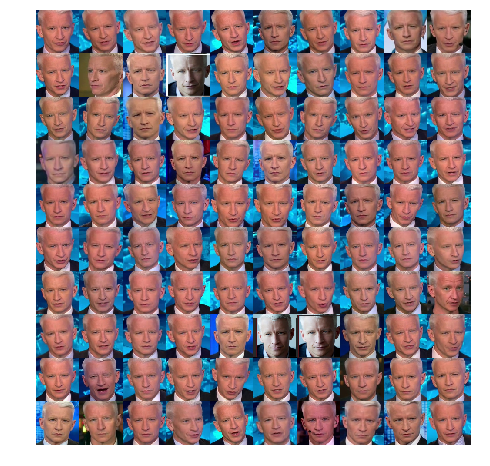

John McCain
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2662.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2943.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/9873.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/11627.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/13408.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/14285.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15406.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15801.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15831.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15969.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/18619.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/20204.pkl'
[Errno 

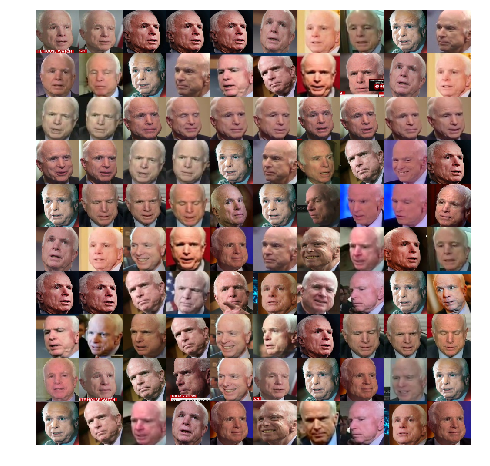

Kellyanne Conway
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2662.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/2943.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/9873.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/11627.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/13408.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/14285.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15406.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15801.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15831.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/15969.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/18619.pkl'
[Errno 2] No such file or directory: '/app/data/face_features_by_video/20204.pkl'
[E

In [ ]:
ac360_videos = list(Video.objects.filter(show__name='Anderson Cooper 360'))

print('Anderson Cooper')
im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in get_similar_faces(anderson_cooper, ac360_videos)[:100]]))
imshow(im)
plt.show()

print('John McCain')
im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in get_similar_faces(john_mccain, ac360_videos)[:100]]))
imshow(im)
plt.show()

print('Kellyanne Conway')
im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in get_similar_faces(kellyanne_conway, ac360_videos)[:100]]))
imshow(im)
plt.show()

print('Paul Ryan')
im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in get_similar_faces(paul_ryan, ac360_videos)[:100]]))
imshow(im)
plt.show()